Machine Learning to predict public sentiment from text data


In [5]:
import numpy as np
import pandas as pd

In [25]:
data = pd.read_csv('/content/judge-1377884607_tweet_product_company1.csv', encoding='unicode_escape')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [26]:
data['is_there_an_emotion_directed_at_a_brand_or_product'].nunique()

4

In [27]:
df = data.drop(['emotion_in_tweet_is_directed_at'],axis=1)

In [28]:
df.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [29]:
df.columns = ["Text", "Label"]
df.head()

,Text,Label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [30]:
df['Label'].value_counts()

No emotion toward brand or product    5386
Positive emotion                      2975
Negative emotion                       570
I can't tell                           156
Name: Label, dtype: int64

In [31]:
df['Label'] = df['Label'].map({'No emotion toward brand or product':2,'Positive emotion':3,'Negative emotion':1,"I can't tell":0})

In [32]:
df.head()

,Text,Label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,1
1,@jessedee Know about @fludapp ? Awesome iPad/i...,3
2,@swonderlin Can not wait for #iPad 2 also. The...,3
3,@sxsw I hope this year's festival isn't as cra...,1
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,3


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9087 entries, 0 to 9086
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9086 non-null   object
 1   Label   9087 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 142.1+ KB


In [34]:
df = df.dropna()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9086 entries, 0 to 9086
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9086 non-null   object
 1   Label   9086 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 213.0+ KB


In [36]:
import gensim
df['text_clean_gensim'] = df['Text'].apply(lambda x: gensim.utils.simple_preprocess(x))
df.head()

,Text,Label,text_clean_gensim
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,1,"[wesley, have, iphone, after, hrs, tweeting, a..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,3,"[jessedee, know, about, fludapp, awesome, ipad..."
2,@swonderlin Can not wait for #iPad 2 also. The...,3,"[swonderlin, can, not, wait, for, ipad, also, ..."
3,@sxsw I hope this year's festival isn't as cra...,1,"[sxsw, hope, this, year, festival, isn, as, cr..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,3,"[sxtxstate, great, stuff, on, fri, sxsw, maris..."


In [39]:
from keras.preprocessing import text
tokenizer = text.Tokenizer() 
tokenizer.fit_on_texts(list(df['text_clean_gensim']))
tokenized_texts = tokenizer.texts_to_sequences(df['text_clean_gensim'])

In [40]:
tokenized_texts[0]

[5464,
 47,
 17,
 242,
 2110,
 590,
 6,
 3720,
 23,
 83,
 831,
 99,
 5,
 1042,
 2449,
 3721,
 6,
 1]

In [41]:
len(tokenizer.word_index)

9283

In [42]:
from keras.utils import pad_sequences
X = pad_sequences(tokenized_texts, maxlen=100)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['Label'].values, test_size=0.2)

In [44]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding,SimpleRNN,Dropout

In [45]:
model = Sequential()
model.add(Embedding(input_dim = len(tokenizer.word_index)+1, output_dim = 128,input_length=100))
model.add(SimpleRNN(10))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax')) 

In [46]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1188352   
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                1390      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 50)                550       
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 204       
                                                                 
Total params: 1,190,496
Trainable params: 1,190,496
Non-

In [47]:
history = model.fit(X_train, y_train, epochs=20,validation_split=0.1)

Epoch 1/20
205/205 [==============================] - 8s 35ms/step - loss: 1.0501 - accuracy: 0.5401 - val_loss: 0.8674 - val_accuracy: 0.6149
Epoch 2/20
205/205 [==============================] - 7s 34ms/step - loss: 0.9250 - accuracy: 0.5820 - val_loss: 0.8469 - val_accuracy: 0.6149
Epoch 3/20
205/205 [==============================] - 7s 33ms/step - loss: 0.8472 - accuracy: 0.6109 - val_loss: 0.8463 - val_accuracy: 0.6135
Epoch 4/20
205/205 [==============================] - 7s 35ms/step - loss: 0.7437 - accuracy: 0.6692 - val_loss: 0.8570 - val_accuracy: 0.5901
Epoch 5/20
205/205 [==============================] - 7s 32ms/step - loss: 0.6386 - accuracy: 0.7372 - val_loss: 0.9030 - val_accuracy: 0.6231
Epoch 6/20
205/205 [==============================] - 7s 34ms/step - loss: 0.5798 - accuracy: 0.7730 - val_loss: 0.9140 - val_accuracy: 0.6094
Epoch 7/20
205/205 [==============================] - 7s 32ms/step - loss: 0.5171 - accuracy: 0.8086 - val_loss: 0.9720 - val_accuracy: 0.6300

In [48]:
y_pred = model.predict(X_test)

57/57 [==============================] - 1s 6ms/step


In [64]:
input_text = 'apple BlackBerry Android'
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=100)
print(encoded_text, pad_encoded)

[11, 185, 34] [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0  11 185  34]]


In [65]:
np.argmax(model.predict(pad_encoded))

1/1 [==============================] - 0s 16ms/step


3

In [66]:
tokenizer.index_word[3]

'the'

In [67]:
for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
  pred_word = tokenizer.index_word[i]
  print("Next word suggestion:",pred_word)

1/1 [==============================] - 0s 17ms/step
Next word suggestion: the
Next word suggestion: mention
Next word suggestion: sxsw


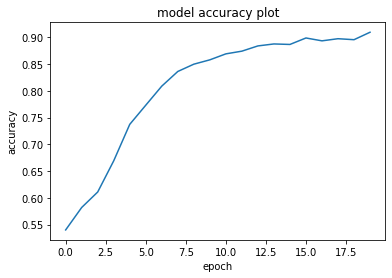

In [68]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

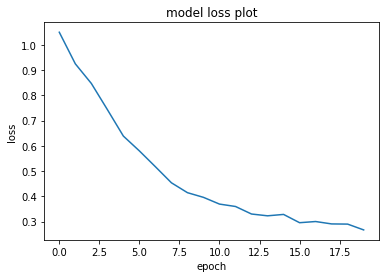

In [69]:
plt.plot(history.history['loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
